# Curve Fitting

Teng-Jui Lin

Content adapted from UW CHEME 375, Chemical Engineering Computer Skills, in Spring 2021.

- Python skills and numerical methods
  - curve fitting by [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
  - minimizing least squared residual by[`scipy.optimize.minimize()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)
- ChemE applications
  - Curve fitting of data
  - Clausius-Clapeyron equation

## Fitting the Clausius-Clapeyron equation

**Problem Statement.** Fit a curve according to the Clausius-Clapeyron equation for the temperature series

`[80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]`

with units of K, and the vapor pressure series

`[4.98e-02, 1.22e+01, 3.65e+02, 4.02e+03, 2.43e+04, 6.62e+04, 1.47e+05, 2.68e+05, 8.91e+05, 9.85e+05, 1.62e+06]`

with units of Pa.

**Solution.** One form of the Clausius-Clapeyron equation is given by

$$
\ln P^* = -\dfrac{\Delta H_{\text{vap}}}{RT} + B,
$$

where $P^*$ is the vapor pressure, $\Delta H_{\text{vap}}$ is the heat of vaporization, $T$ is the absolute temperature, $R$ is the ideal gas constant, and $B$ is a constant.

Given $P^*$ and $T$ datasets, we can fit the Clausius-Clapeyron equation by recognizing that

$$
\ln P^* = \dfrac{A}{T} + B,
$$

where $A = -\dfrac{\Delta H_{\text{vap}}}{R}$, is a linear equation of $\ln P^*$ and $\dfrac{1}{T}$.

We can also write it in the exponential form:

$$
P^* = \exp\left(\dfrac{A}{T} + B\right).
$$

### Implementation: Curve fitting using `scipy.optimize.curve_fit()`

In this approach, we use [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) to fit the exponential form directly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [2]:
# define given data points
T = np.array([80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280])
Pv = np.array([4.98e-02, 1.22e+01, 3.65e+02, 4.02e+03, 2.43e+04, 6.62e+04, 1.47e+05, 2.68e+05, 8.91e+05, 9.85e+05, 1.62e+06])

In [3]:
def clausius_clapeyron(T, A, B):
    '''Exponential form of the Clausius-Clapeyron equation'''
    return np.exp(A/T + B)

In [4]:
# use scipy.optimize.curvefit()
popt, pcov = curve_fit(clausius_clapeyron, T, Pv)
popt

array([-1477.20170831,    19.57105488])

In [5]:
# define curve fit line
T_fit = np.arange(60, 300, 10)
Pv_fit = clausius_clapeyron(T_fit, *popt)

In [6]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

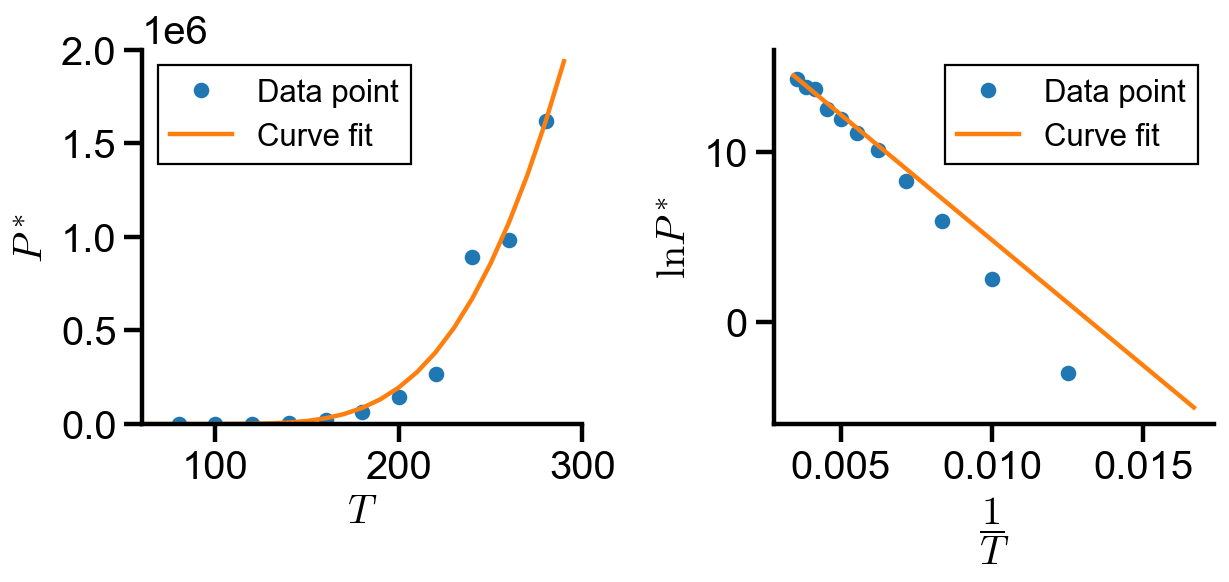

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(T, Pv, 'o', label='Data point')
axs[0].plot(T_fit, Pv_fit, label='Curve fit')
axs[0].set_xlabel('$T$')
axs[0].set_ylabel('$P^*$')
axs[0].set_xlim(60, 300)
axs[0].set_ylim(0, 2e6)
axs[0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs[0].legend()

axs[1].plot(1/T, np.log(Pv), 'o', label='Data point')
axs[1].plot(1/T_fit, np.log(Pv_fit), label='Curve fit')
axs[1].set_xlabel('$\dfrac{1}{T}$')
axs[1].set_ylabel('$\ln P^*$')
axs[1].set_ylim(top=16)
axs[1].legend()


plt.tight_layout(True)

By inspection of the linear form, the curve fit did not best fit the trend as $\dfrac{1}{T}$ increases.

### Implementation: Curve fitting using `scipy.optimize.curve_fit()`

In this approach, we use [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) to fit the linearized form.

In [8]:
def clausius_clapeyron_linear(x, A, B):
    '''Linear form of the Clausius-Clapeyron equation'''
    return A*x + B

In [9]:
# use scipy.optimize.curvefit()
popt, pcov = curve_fit(clausius_clapeyron_linear, 1/T, np.log(Pv))
popt

array([-1915.93999621,    21.54152215])

In [10]:
# define curve fit line
inv_T_fit = 1/np.arange(60, 300, 10)
ln_Pv_fit = clausius_clapeyron_linear(1/T_fit, *popt)

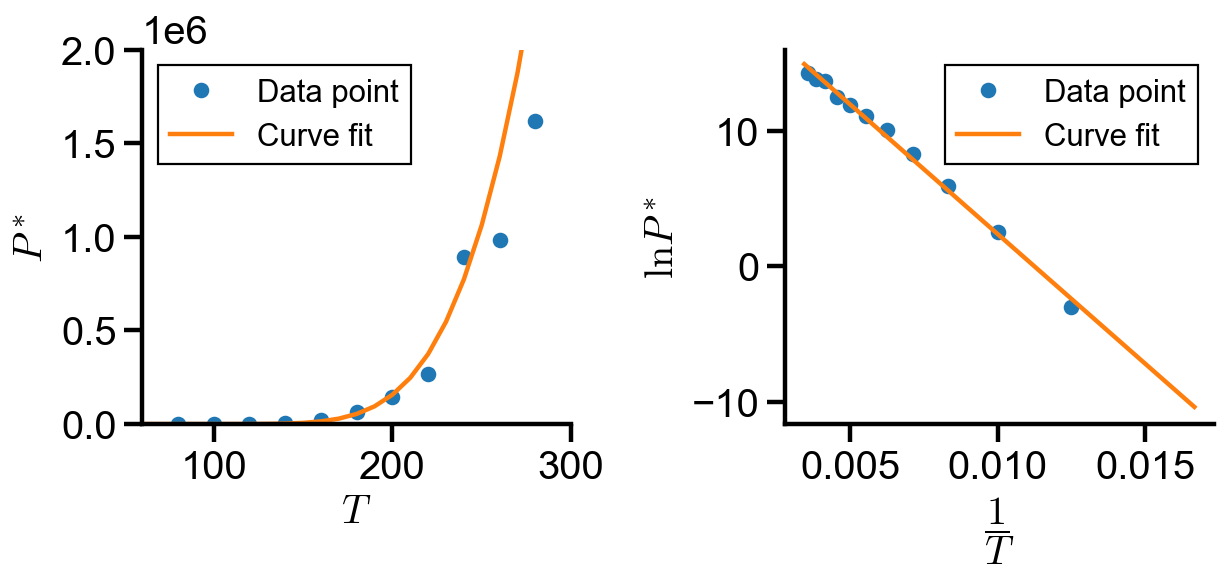

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(T, Pv, 'o', label='Data point')
axs[0].plot(1/inv_T_fit, np.exp(ln_Pv_fit), label='Curve fit')
axs[0].set_xlabel('$T$')
axs[0].set_ylabel('$P^*$')
axs[0].set_xlim(60, 300)
axs[0].set_ylim(0, 2e6)
axs[0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs[0].legend()

axs[1].plot(1/T, np.log(Pv), 'o', label='Data point')
axs[1].plot(inv_T_fit, ln_Pv_fit, label='Curve fit')
axs[1].set_xlabel('$\dfrac{1}{T}$')
axs[1].set_ylabel('$\ln P^*$')
axs[1].set_ylim(top=16)
axs[1].legend()

plt.tight_layout(True)

### Implementation: Curve fitting using `scipy.optimize.minimize()`

The residual (error) between the $i$th data point and the best fit line can be defined as

$$
\mathrm{Res} = x_{\text{fit}, i} - x_{\text{data}, i},
$$

so the sum of squared residual (SSR) is

$$
\mathrm{SSR} = \sum (\mathrm{Res})^2 = \sum_{i=1}^n (x_{\text{fit}, i} - x_{\text{data}, i})^2
$$

The best fit line of the data points will have a minimum SSR.

In this approach, we use [`scipy.optimize.minimize()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to minimize the sum of squared residual of the exponential form.

In [12]:
def clausius_clapeyron_SSR(params):
    '''Sum of squared residal of the Clausius-Clapeyron equation'''
    A, B = params
    return np.sum(((Pv - clausius_clapeyron(T, A, B))/(0.1*Pv))**2)

In [13]:
# define initial guess
A_guess = -1000
B_guess = 10
guess = [A_guess, B_guess]

In [14]:
# use scipy.optimize.minimize()
res = minimize(clausius_clapeyron_SSR, guess)
res.x

array([-1931.98479473,    21.45976783])

In [15]:
# define curve fit line
T_fit = np.arange(60, 300, 10)
Pv_fit = clausius_clapeyron(T_fit, *res.x)

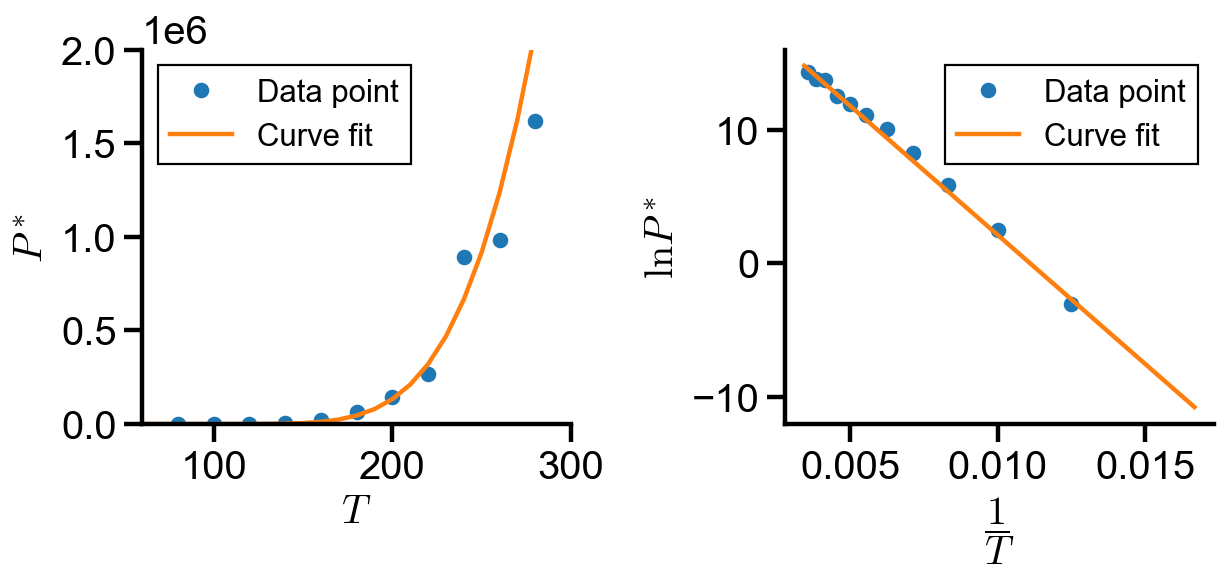

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(T, Pv, 'o', label='Data point')
axs[0].plot(T_fit, Pv_fit, label='Curve fit')
axs[0].set_xlabel('$T$')
axs[0].set_ylabel('$P^*$')
axs[0].set_xlim(60, 300)
axs[0].set_ylim(0, 2e6)
axs[0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs[0].legend()

axs[1].plot(1/T, np.log(Pv), 'o', label='Data point')
axs[1].plot(1/T_fit, np.log(Pv_fit), label='Curve fit')
axs[1].set_xlabel('$\dfrac{1}{T}$')
axs[1].set_ylabel('$\ln P^*$')
axs[1].set_ylim(top=16)
axs[1].legend()

plt.tight_layout(True)

## Conclusion

In this notebook, we explored implementation of curve fitting using `curve_fit()` and `minimize()`. The coefficients found in each implementation is summarized below:

|No.|Method|$A$|$B$|
|-:|:-|-:|-:|
|1|`curve_fit()` with exponential form|-1477|19.57|
|2|`curve_fit()` with linear form|-1916|21.54|
|3|`minimize()` with exponential form|-1932|21.46|
|||||

By inspection of the graphs and the coefficient table, we found that method 2 and 3 most accurately fits the over data trend, whereas method 1 fails to capture the trend at small $T$.